# Exploratory Data Analysis and Cleaning

## Date: OCT 10, 2023

## Introduction
This notebook cleans the data for the lending club accepted loans. However, there are some rows that have values shifted column to column, resulting in different data types within a single column.  

### Table-of-contents


1. [Introduction](#Introduction)
   - [Table-of-contents](#Table-of-contents)
   - [Data Dictionary](#Data-Dictionary)
   - [Import-Librarys](#Import-Librarys)
   - [Define-Functions](#Define-Functions)
   - [Handle-mixed-data-types](#Handle-mixed-data-types)
3. [Data Cleaning](#Data-Cleaning)
   - [Initial Exploration](#Initial-Exploration)
   - [Explore Columns to drop](#Explore-Columns-to-drop)4. [Dataframe optimization](#Dataframe-optimization)
5. [Exploratory-Data-Analysiss](Exploratory-Data-Analysis)
6. [Feature Engineering](#Feature-Engineering)
7. . [Conclusion](#Conclusion)


## Data-Dictionary

The data dictionary can be found in the README and downloaded from kaggle as a csv as it is quite extensive.

#### Import-Librarys

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

#### Define-Functions

When initially loading in the dataset, Pandas raised a DtypeWarning over mixed datatypes within various columns. Setting low_memory = False while breaking the CSV into chunks allows Pandas to load an entire chunk before guessing the data types. When the script to scrape the data dictionary is finished, the data dict can then be passed in instead of relying on pandas. The mixed_data_types function is stilled called as a sanity check.

In [2]:
def mixed_data_types(df:pd.DataFrame) -> bool:
    '''
    Takes in a dataframe and checks for columns with mixed data types
    If none are found return False, else True
    
    :param df: The dataframe to be checked
    :type df: obj
    :return bool: True if found, false if none were found
    :type return: bool
    '''
    
    #loop through each column
    for column in df:

        #filter outint datatypes coming from Nan and get unique data types
        unique_types = df[column].dropna(inplace=False).apply(type).unique()

        #if there are more than 1 datatype in a column
        if unique_types.size > 1:
            return True
    return False

#### Handle-mixed-data-types

Due to the size of the dataset, it is read in chunks. After each chunk is read and checked for mixed data types, it is randomly sampled and then placed within a list. The different samples are then combined into a single sample representative of the whole dataset. EDA will be performed on this single sample.

In [3]:
chunk_size = 5*100000
sample_size =  100000
random_state = 11

assert sample_size < chunk_size, f"Cannot take a sample of {sample_size} rows out of {chunk_size} rows"

print(f'Chunk size: {chunk_size} rows')
print(f'Rows to be sampled: {sample_size} rows')


sampled_dataframes = []
try:
    data_destination = Path('../Data/Lending_club/accepted_2007_to_2018Q4.csv')

    #split the csv into chunks and iterate over each chunk
    with pd.read_csv(data_destination, chunksize=chunk_size, low_memory = False) as reader:
        for count,chunk in enumerate(reader):
            
            if mixed_data_types(df=chunk) == True:
                raise Exception("Mixed data types found")
            
            sampled_df = chunk.sample(n=sample_size, random_state=random_state)
            sampled_dataframes.append(sampled_df)
            print(f"{count} sampled dataframe shape: {sampled_df.shape}")
        print('Finished')

except FileNotFoundError as e:
    print(e.args[1])
    print('Check file name and location')
    
except Exception as e:
    print(e.args[1])

Chunk size: 500000 rows
Rows to be sampled: 100000 rows
0 sampled dataframe shape: (100000, 151)
1 sampled dataframe shape: (100000, 151)
2 sampled dataframe shape: (100000, 151)
3 sampled dataframe shape: (100000, 151)
4 sampled dataframe shape: (100000, 151)
Finished


There are no duplicate datatypes within any columns. The random samples can be combined into a single sample dataframe. This sample will be used as the dataset to use.

In [4]:
sample_accepted_df = pd.concat(sampled_dataframes, ignore_index=False)

&nbsp;

## Data Cleaning

In [5]:
pd.set_option('display.max_columns', None)

Set pandas display option to show all columns

&nbsp;

### Initial Exploration

***Display the first 5 rows*** 

In [6]:
sample_accepted_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
408717,38538355,NaN,11550.0,11550.0,11550.0,36 months,11.99,383.58,B,B5,Sales Associate,10+ years,RENT,33754.95,Source Verified,Jan-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,900xx,CA,26.21,0.0,Dec-1991,675.0,679.0,0.0,NaN,72.0,9.0,1.0,7238.0,49.2,20.0,f,0.00,0.00,5158.650000,5158.65,2805.61,1014.80,0.0,1338.24,240.8832,Nov-2015,383.58,NaN,Oct-2016,554.0,550.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,20413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14700.0,NaN,NaN,NaN,3.0,2268.0,1630.0,81.3,0.0,0.0,150.0,277.0,20.0,6.0,1.0,39.0,NaN,NaN,NaN,0.0,3.0,4.0,3.0,6.0,4.0,7.0,15.0,4.0,9.0,0.0,0.0,0.0,1.0,100.0,66.7,1.0,0.0,32700.0,20413.0,8700.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
229511,54313184,NaN,16775.0,16775.0,16775.0,60 months,15.61,404.47,D,D1,Teller,10+ years,MORTGAGE,38168.00,Source Verified,Jul-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,672xx,KS,14.40,0.0,Jul-2004,660.0,664.0,0.0,NaN,NaN,26.0,0.0,17032.0,53.8,41.0,w,5808.34,5808.34,17782.130000,17782.13,10966.66,6815.47,0.0,0.00,0.0000,Mar-2019,404.47,Apr-2019,Mar-2019,744.0,740.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,214.0,68813.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31674.0,NaN,NaN,NaN,6.0,3277.0,3681.0,82.1,0.0,0.0,122.0,131.0,10.0,10.0,2.0,22.0,NaN,12.0,NaN,0.0,6.0,7.0,8.0,14.0,7.0,24.0,32.0,7.0,26.0,0.0,0.0,0.0,1.0,100.0,75.0,0.0,0.0,91524.0,1

&nbsp;

***Dataframe shape***

In [7]:
rows, columns = sample_accepted_df.shape
print(f'Dataframe rows: {rows}')
print(f'Dataframe columns: {columns}')

Dataframe rows: 500000
Dataframe columns: 151


&nbsp;

***Dataframe info***

In [8]:
sample_accepted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 408717 to 2006217
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 579.8+ MB


Of the 151 columns, 113 are float64 and 38 are objects. The dataframe takes up approximatly 580 MB.
Note:
- The numeric columns are all float64 and the object columns. These columns can be optimized later to save memory space and decrease computation time by changing the datatypes.
- There is no datetime column

&nbsp;

***Describe Dataframe***

In [9]:
sample_accepted_df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,499992.000000,499992.000000,499992.000000,499992.000000,499992.000000,4.999910e+05,499612.000000,499988.000000,499992.000000,499992.000000,499988.000000,244645.000000,80269.000000,499988.000000,499988.000000,4.999920e+05,499562.000000,499988.000000,499992.000000,499992.000000,499992.000000,499992.000000,499992.000000,499992.000000,4.999920e+05,499992.000000,499992.000000,499992.000000,499992.000000,499992.000000,499969.000000,129402.000000,499992.0,2.792400e+04,27923.000000,499988.000000,485935.000000,4.859350e+05,327517.000000,327517.000000,327517.000000,327517.000000,317069.000000,3.275170e+05,280016.000000,327517.000000,327517.000000,327517.000000,327462.000000,4.859350e+05,327517.000000,327517.000000,327517.000000,490018.000000,485924.000000,484319.000000,484074.000000,499969.000000,499988.000000,470351.000000,485935.000000,485935.000000,485935.000000,490018.000000,484669.000000,115213.000000,435627.000000,164061.000000,485935.000000,485935.000000,485935.000000,488282.000000,485935.000000,485935.000000,485935.000000,485935.000000,485935.000000,488282.000000,466483.000000,485935.000000,485935.000000,485935.000000,485909.000000,484248.000000,499714.000000,499974.000000,4.859350e+05,4.900180e+05,490018.000000,4.859350e+05,24603.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24179.000000,24604.000000,24604.000000,24604.000000,24604.000000,8150.000000,2542.0,2542.000000,2542.0,2542.000000,2021.000000,2542.000000,2542.000000,7398.000000,7398.000000,7398.000000
mean,NaN,15014.911589,15010.218413,14993.045814,13.105586,445.405616,7.807225e+04,18.833484,0.307261,698.732270,702.732492,0.571258,34.555871,72.126462,11.600126,0.200049,1.664924e+04,50.044462,24.055763,4264.585065,4263.611967,11983.934957,11966.827390,9427.047136,2414.427206,1.527768e+00,140.932849,23.577253,3430.033461,687.707851,675.593820,0.018635,44.157648,1.0,1.226873e+05,19.265859,0.004156,224.714733,1.424189e+05,0.936855,2.780295,0.677171,1.571070,21.148062,3.551788e+04,69.133899,1.290886,2.753457,5780.577222,57.049670,3.466175e+04,1.009401,1.475887,2.034826,4.532252,13539.739056,11478.07804

Some key points:

- Loan Amount
  
    - Average Loan Amount is ~ 15,000 USD with a standard deviation of 9240 USD, having a max of 40,000 USD and minimum of 500 USD. This follows LendingClubs  policies for minimum and maximum loan amounts.

- Funded amount
    - Nearly identical to the loan amount

- Funded amount by investors
    - Very similar to the  funded amount

- Interest Rate
    - The interest rates are quite high. An average of 13%, with a minimum of 5.3% and a maximum of 31%.


   

&nbsp;

***Dataframe Null Values***

In [10]:
sample_accepted_df.isnull().sum()

id                            0
member_id                500000
loan_amnt                     8
funded_amnt                   8
funded_amnt_inv               8
                          ...  
settlement_status        492602
settlement_date          492602
settlement_amount        492602
settlement_percentage    492602
settlement_term          492602
Length: 151, dtype: int64

In [11]:
#loop through columns and calculate percentage of rows that are nulls
for column in sample_accepted_df.columns:
    row_null_count = sample_accepted_df[column].isnull().sum()
    row_count = sample_accepted_df[column].shape[0]
    
    print(column, round((row_null_count / row_count)*100,2), '%')

id 0.0 %
member_id 100.0 %
loan_amnt 0.0 %
funded_amnt 0.0 %
funded_amnt_inv 0.0 %
term 0.0 %
int_rate 0.0 %
installment 0.0 %
grade 0.0 %
sub_grade 0.0 %
emp_title 7.37 %
emp_length 6.54 %
home_ownership 0.0 %
annual_inc 0.0 %
verification_status 0.0 %
issue_d 0.0 %
loan_status 0.0 %
pymnt_plan 0.0 %
url 0.0 %
desc 95.01 %
purpose 0.0 %
title 1.01 %
zip_code 0.0 %
addr_state 0.0 %
dti 0.08 %
delinq_2yrs 0.0 %
earliest_cr_line 0.0 %
fico_range_low 0.0 %
fico_range_high 0.0 %
inq_last_6mths 0.0 %
mths_since_last_delinq 51.07 %
mths_since_last_record 83.95 %
open_acc 0.0 %
pub_rec 0.0 %
revol_bal 0.0 %
revol_util 0.09 %
total_acc 0.0 %
initial_list_status 0.0 %
out_prncp 0.0 %
out_prncp_inv 0.0 %
total_pymnt 0.0 %
total_pymnt_inv 0.0 %
total_rec_prncp 0.0 %
total_rec_int 0.0 %
total_rec_late_fee 0.0 %
recoveries 0.0 %
collection_recovery_fee 0.0 %
last_pymnt_d 0.11 %
last_pymnt_amnt 0.0 %
next_pymnt_d 58.02 %
last_credit_pull_d 0.0 %
last_fico_range_high 0.0 %
last_fico_range_low 0.0 %
c

We can create a list to keep track of the columns to drop at the end of the data cleaning. This allows us to potentially alter which columns to drop incase we get new information.

In [12]:
columns_to_drop = []

We can drop columns that are linked to LendingClubs internal tracking of the loans. 

In [13]:
columns_to_drop.extend(['member_id','url'])

&nbsp;

### Explore Columns to drop

***Hardship Loans***

In [14]:
#fetch the value counts for the for the hardships flags
hardships = sample_accepted_df['hardship_flag'].value_counts()

#pull out the count of hardships loans, as well as the total number of rows
yes_hardship = hardships.iloc[1]
df_row_count = sample_accepted_df.shape[0]

display(hardships)

hardship_str = f"""\nSince there are {yes_hardship} hardship loans,
representing only {(yes_hardship/df_row_count)*100}% of the dataframe,
we can safely drop the associated rows and columns. Note however, 
our analysis now cannot be applied to hardship loans."""

print(hardship_str)

hardship_flag
N    499787
Y       205
Name: count, dtype: int64


Since there are 205 hardship loans,
representing only 0.041% of the dataframe,
we can safely drop the associated rows and columns. Note however, 
our analysis now cannot be applied to hardship loans.


&nbsp;

***Drop Hardship loans***

In [15]:
rows_to_remove = sample_accepted_df.loc[sample_accepted_df['hardship_flag'] == 'Y'].index
sample_accepted_df.drop(rows_to_remove, inplace=True)

Check rows have been dropped

In [16]:
sample_accepted_df['hardship_flag'].value_counts()

hardship_flag
N    499787
Name: count, dtype: int64

The hardship loans have been dropped. We can now add the associated columns to the drop column list

In [17]:
columns_to_drop.extend(['hardship_flag', 'hardship_type',
                        'hardship_reason', 'hardship_status',
                        'hardship_amount', 'hardship_start_date',
                        'hardship_end_date', 'deferral_term ',
                        'hardship_length', 'hardship_dpd',
                        'hardship_loan_status', 'payment_plan_start_date',
                        'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount',
                        'hardship_last_payment_amount'])

&nbsp;

***Employee Title***

In [18]:
sample_accepted_df['emp_title'].value_counts()

emp_title
Teacher                              8812
Manager                              7640
Owner                                5097
Registered Nurse                     3554
Driver                               3339
                                     ... 
Psyhcotherapits                         1
Director of Strategic Partnersips       1
Cash Supervisor                         1
Service Mananger                        1
International Training Manager          1
Name: count, Length: 153761, dtype: int64

There are too many unique Employee titles to attempt a grouping using regex. In the future NLP could be used to group them but for now we will simply drop the column.

In [19]:
columns_to_drop.append('emp_title')

&nbsp;

***Loan Status***

In [20]:
sample_accepted_df['loan_status'].value_counts()

loan_status
Fully Paid                                             231673
Current                                                201358
Charged Off                                             58405
Late (31-120 days)                                       4898
In Grace Period                                          1931
Late (16-30 days)                                         969
Does not meet the credit policy. Status:Fully Paid        396
Does not meet the credit policy. Status:Charged Off       146
Default                                                    11
Name: count, dtype: int64

The "Does not meet the credit policy" means when the loans were made under a different credit card policy, that does not meet the current policy. This has no effect on the loans, so they can be grouped with their counter parts. Charged off and Defaulted can also been grouped together.

In [21]:
status_mapping = {
    "Fully Paid": "Fully Paid",
    "Does not meet the credit policy. Status:Fully Paid": "Fully Paid",
    "Current": "Current",
    "Charged Off": "Charged Off/Default",
    "Does not meet the credit policy. Status:Charged Off": "Charged Off/Default",
    "Default": "Charged Off/Default",
    "Late (31-120 days)": "Late (31-120 days)",
    "Late (16-30 days)": "Late (16-30 days)",
    "In Grace Period": "In Grace Period"
}

sample_accepted_df['loan_status'] = sample_accepted_df['loan_status'].map(status_mapping)

Check the mapping has worked:

In [22]:
sample_accepted_df['loan_status'].value_counts()

loan_status
Fully Paid             232069
Current                201358
Charged Off/Default     58562
Late (31-120 days)       4898
In Grace Period          1931
Late (16-30 days)         969
Name: count, dtype: int64

The mapping was successful

### Dataframe-optimization

TODO: Optimize column datatypes to reduce code runtime and increase memory efficiency

### Exploratory-Data-Analysis

Explore the relationship between interest rate and loan amount

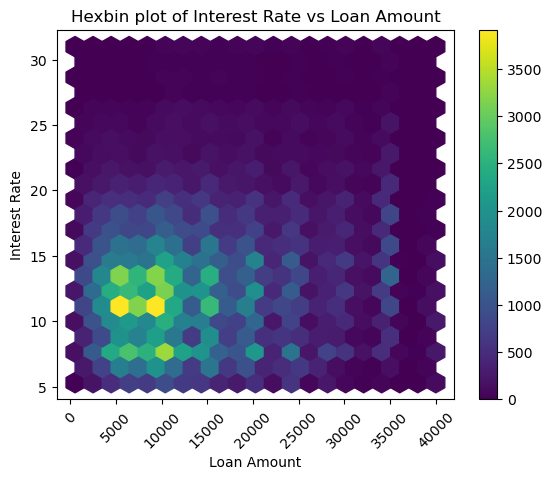

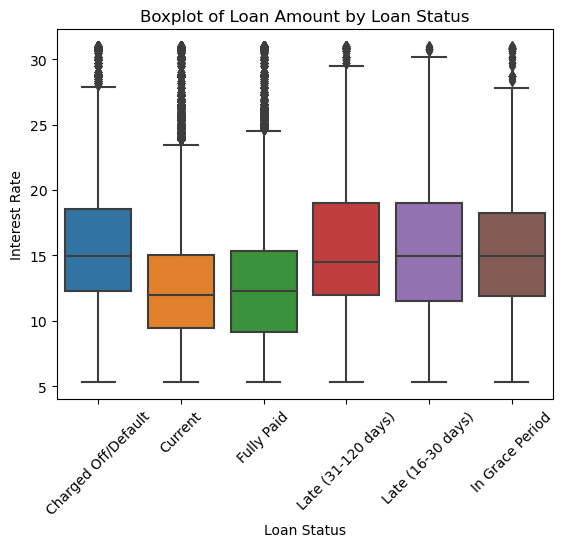

In [23]:
# Separate the data between fully paid and charged off / defaulted loans
paid_loans = sample_accepted_df[sample_accepted_df['loan_status'] == "Fully Paid"]
defaulted_loans = sample_accepted_df[sample_accepted_df['loan_status'] == "Charged Off/Default"]

# A hexbin is more appropriate due to the number of datapoints being plotted. The count of each hex is plotted on the right
plt.hexbin(paid_loans['funded_amnt'], paid_loans['int_rate'], gridsize=20, label='Fully Paid')
plt.colorbar()
plt.xlabel('Loan Amount')
plt.xticks(rotation=45) 
plt.ylabel('Interest Rate')
plt.title('Hexbin plot of Interest Rate vs Loan Amount')
plt.show()

sns.boxplot(data=sample_accepted_df, x='loan_status', y='int_rate')
plt.xticks(rotation=45) 
plt.title('Boxplot of Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

Notice how there isn't much variation between late and "in grace period" loans, but there is between fully payed and defaulted / charged off loans. Charged off / defaulted loans have the highest median interest rate, with fully paid loans having one of the lowest. When considered with the hexplot, the majority of loans fall between $5,000 and $10,000, with an interest rate of approximately 12%, with the defaulted / charged off loans have a much higher interest rate, being further from the central grouping of data on the hex plot. 

### Feature-Engineering

TODO:
- Loan-to-income ratio
- Loan purpose one hot encoding
- simplify loan grade and subgrade

purpose

## Conclusion

### Resources used:

- https://stackoverflow.com/questions/51325601/how-to-stop-my-pandas-data-table-from-being-truncated-when-printed